# Projrct Phase 2

## Table Of Contents:
* [Decision Tree](#Decision_Tree)
   * [Splitting the Data and Cross Validating](#section_1_1)
   * [Calculating Precision, Recall, and F1-Score](#section_1_2)
   * [Visualization of Decsison Tree](#section_1_3)
   * [Hyper Parameter Tuning](#section_1_4)
   * [Calculating Precision, Recall, and F1-Scores on new classifier](#section_1_5)
   * [Visualizing Graphs](#section_1_6)
   * [Calculating Precision, Recall, and F1-Score with Test Data](#section_1_7)
   * [Visualization of Graphs using the Test Data](#section_1_8)
   * [Visualization of Decsison Tree after Hyper Parameter Tuning](#section_1_9)   
   
* [Support Vector Machines](#Support_Vector_Machines)
   * [Features Selection](#section_2_1)
       * [Measuring Correlation](#section_2_1_1)
   * [Feature Unique Values](#section_2_2_0)
       * [Observation](#section_2_2_1)       
   * [Training Data](#section_2_2)
   * [Support Vectors](#section_2_3)
   * [Hyper Parameter Tuning for SVM](#Hyper_Parameter_Tuning_for_SVM)
   * [Performance Measurments](#section_2_4)
   * [Metrics Measurments for Test Data](#section_2_5)
   * [Plot Decision Boundary](#section_2_6)

# Decision Tree  <a class="anchor" id="Decision_Tree"></a>

In [1]:
#imports for Decision Tree
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import neighbors, datasets , metrics,decomposition
from sklearn.metrics import confusion_matrix,f1_score,PrecisionRecallDisplay ,classification_report
from sklearn.metrics import precision_score,recall_score,precision_recall_curve , accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

from six import StringIO
from IPython.display import Image
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read dataset:
dataset = pd.read_csv(r"data.csv")

#Features in Variable X
X = dataset[["location", "country", "gender", "age", "vis_wuhan", "from_wuhan", "symptom1", "symptom2" , "symptom3" , "symptom4","symptom5" ,"symptom6", "diff_sym_hos"]]
#removed symptom6 as it is constant for all the dataset 
X.drop("symptom6", axis =1, inplace = True)
X.drop("symptom5", axis =1, inplace = True)
feature_cols=["location", "country", "gender", "age", "vis_wuhan", "from_wuhan", "symptom1", "symptom2" , "symptom3" , "symptom4", "diff_sym_hos"]

#Classes in Variable y
y= dataset["result"]



## Splitting the Data and Cross Validating <a class="anchor" id="section_1_1"></a>

In [3]:
X_train,X_test, y_train, y_test =  train_test_split (X,y, test_size= 0.3, random_state=10, shuffle= True)
X_train,X_validate, y_train, y_validate =  train_test_split (X_train,y_train, test_size= 0.2, random_state=0, shuffle= True)

In [4]:
#creating instance of Decision Tree classifier
classifier = DecisionTreeClassifier(random_state= 10)
classifier.fit(X_train, y_train)

#predicting the values from the cross validation function
y_CV_Pred = cross_val_predict(classifier, X_validate, y_validate, cv=5)

## Calculating Precision, Recall, and F1-Score <a class="anchor" id="section_1_2"></a>

In [5]:
#Predicting the output of classifier before hyperparameter Tuning
y_pred = classifier.predict(X_test)
precision = precision_score(y_validate, y_CV_Pred, average= "macro")
recall = recall_score(y_validate, y_CV_Pred, average= "macro")
F1 = f1_score(y_validate, y_CV_Pred, average= "macro")
score = accuracy_score(y_validate, y_CV_Pred)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1_score: ", F1)
print("The predicted accuracy is ", score)

Recall:  0.8597626752966558
Precision:  0.8301980198019802
F1_score:  0.8439112487100102
The predicted accuracy is  0.9173553719008265


In [6]:
#Getting Accuracy of the Model
print ("Accuracy: ", classifier.score(X_validate,y_validate))

Accuracy:  0.9421487603305785


In [7]:
print(confusion_matrix(y_test,y_pred))

[[221   4]
 [  7  27]]


## Visualization of Decsison Tree <a class="anchor" id="section_1_3"></a>

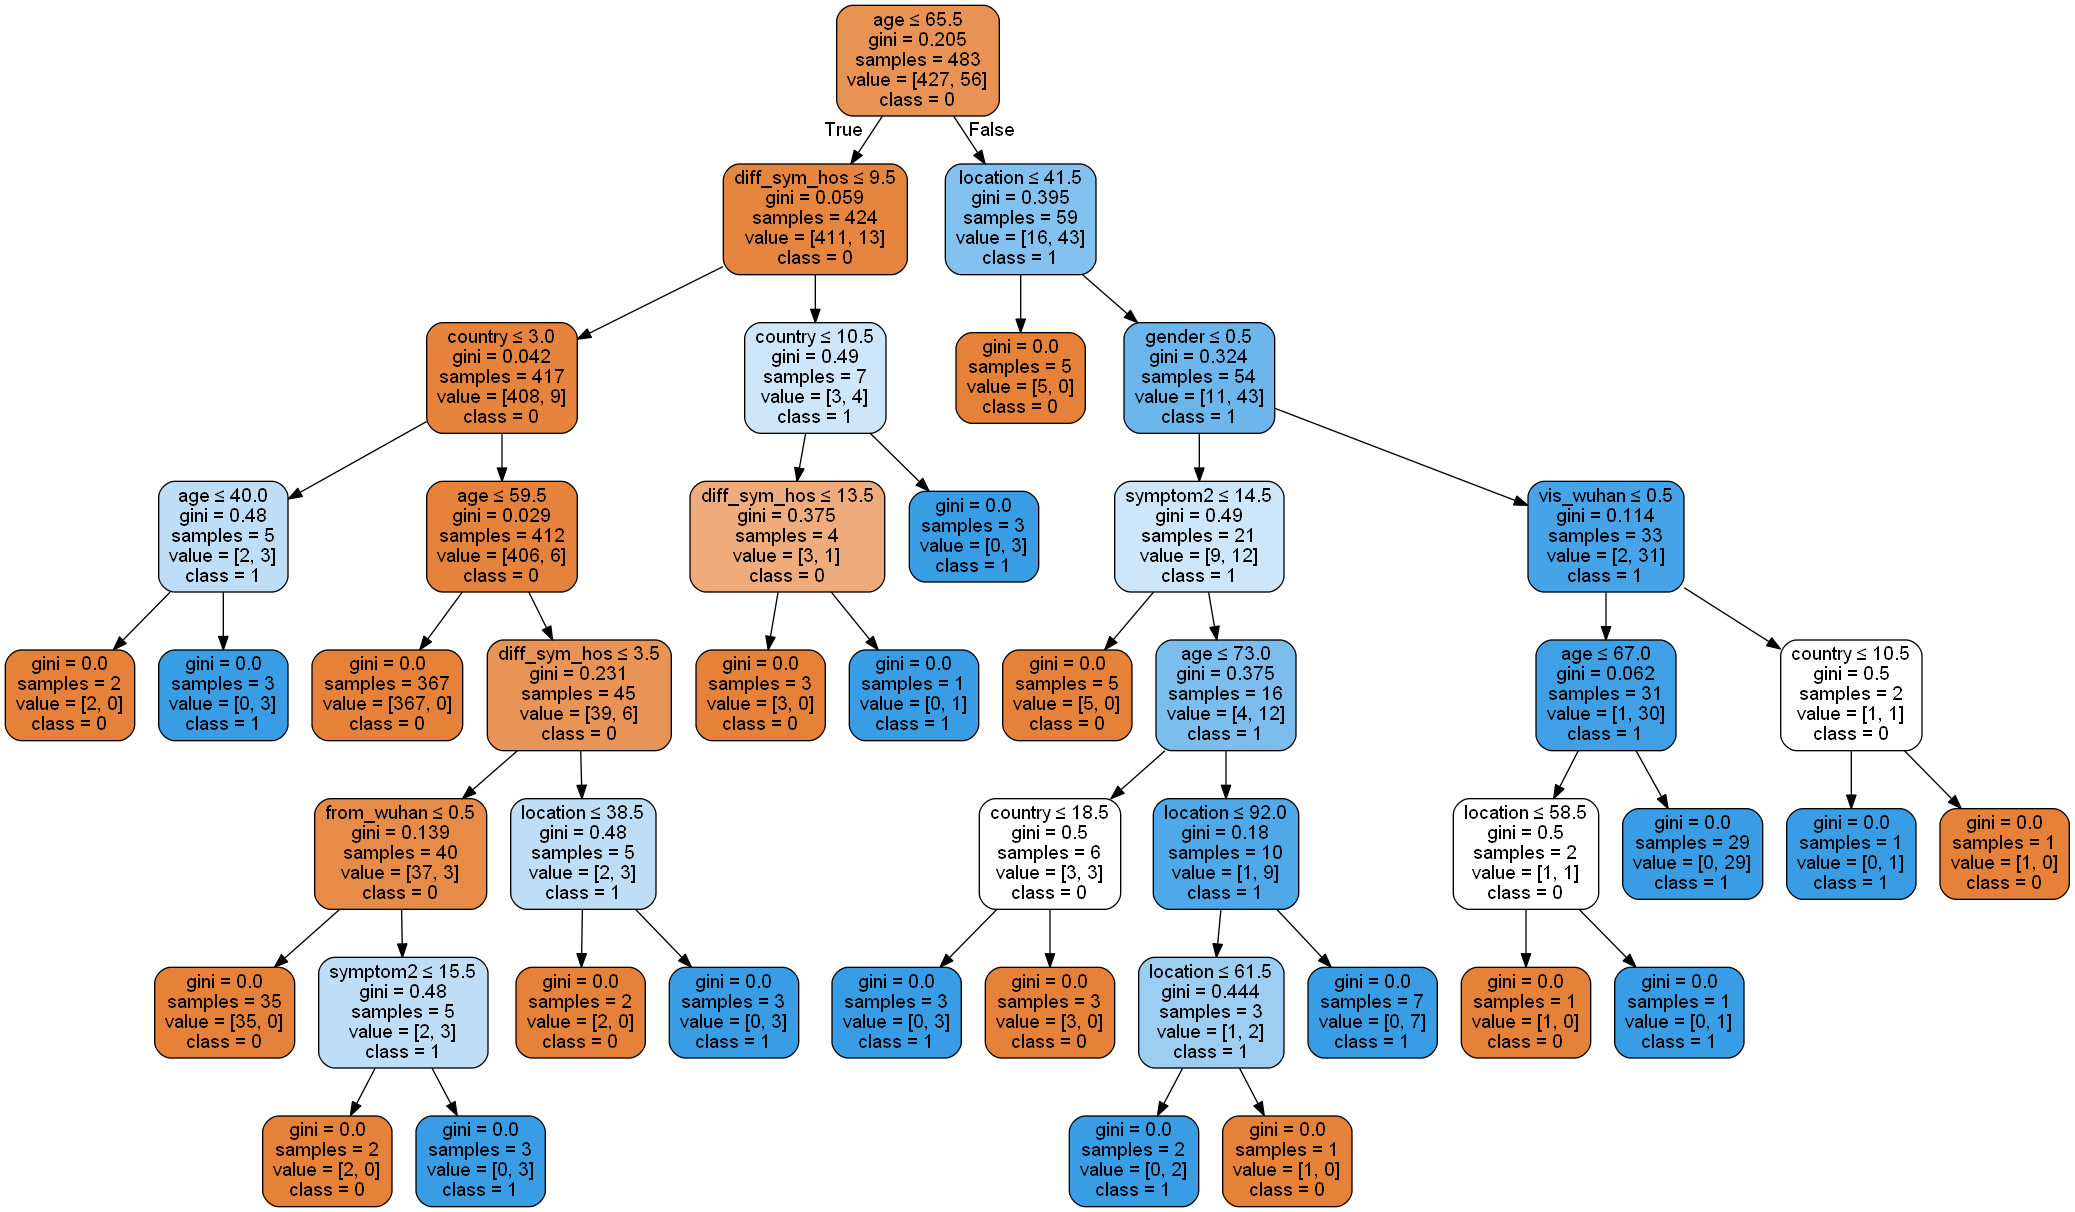

In [8]:
#Plotting Decision Tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,rounded= True,filled =True , special_characters = True ,feature_names= feature_cols, class_names = ["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Data.png")
Image(graph.create_png())

## Hyper Parameter Tuning <a class="anchor" id="section_1_4"></a>

In [9]:
#Creating instances of standard scaler and PCA and pipeline to Preprocess the data and remove any outliers
std_slc = StandardScaler()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('std_slc', std_slc),('pca', pca),('dec_tree', classifier)])
n_components = list(range(1,X.shape[1]+1,1))

In [10]:
#Giving range for each parameter that will be hyperparameter tuned before putting it in the grid search 
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
min_weight_fraction_leaf =[0.0,0.01,0.02,0.03]
class_weight =['balanced',None]

In [11]:
#dectionary containing the Hyeper parameters
parameters = dict(  pca__n_components=n_components, dec_tree__criterion=criterion, 
                  dec_tree__max_depth=max_depth
                 ,dec_tree__class_weight=class_weight, 
                  dec_tree__min_weight_fraction_leaf=min_weight_fraction_leaf)

In [12]:
#Hyper parameter Tuning
clf_GS = GridSearchCV(pipe, parameters,cv =5, verbose=True)
clf_GS.fit(X_train, y_train)

Fitting 5 folds for each of 1056 candidates, totalling 5280 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree',
                                        DecisionTreeClassifier(random_state=10))]),
             param_grid={'dec_tree__class_weight': ['balanced', None],
                         'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'dec_tree__min_weight_fraction_leaf': [0.0, 0.01, 0.02,
                                                                0.03],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11]},
             verbose=True)

In [13]:
#printing the optimal hyper parameters
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print('Best Number Of ccp_alpha:', clf_GS.best_estimator_.get_params()['dec_tree__ccp_alpha'])
print('Best Number Of min_weight_fraction_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_weight_fraction_leaf'])
print('Best Number Of class__weight:', clf_GS.best_estimator_.get_params()['dec_tree__class_weight'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best Criterion: entropy
Best max_depth: 8
Best Number Of Components: 7
Best Number Of ccp_alpha: 0.0
Best Number Of min_weight_fraction_leaf: 0.01
Best Number Of class__weight: None

DecisionTreeClassifier(criterion='entropy', max_depth=8,
                       min_weight_fraction_leaf=0.01, random_state=10)


In [14]:
#creating new classifier with optimal parameters
classifier2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=8,
                                     max_features=7, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.01, random_state=10,
                                     splitter='best')
classifier2.fit(X_train, y_train)
                                     

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=7,
                       min_weight_fraction_leaf=0.01, random_state=10)

## Calculating Precision, Recall, and F1-Scores on new classifier<a class="anchor" id="section_1_5"></a>

In [15]:
y_pred=classifier2.predict(X_test)
score2 = accuracy_score(y_test, y_pred)
y_CV_Pred = cross_val_predict(classifier2, X_validate, y_validate, cv=5)
print("The predicted accuracy is ", score2)
precision = precision_score(y_validate, y_CV_Pred, average= "macro")
recall = recall_score(y_validate, y_CV_Pred, average= "macro")
F1 = f1_score(y_validate, y_CV_Pred, average= "macro")
print("Recall: ", recall)
print("Precision: ", precision)
print("F1_score: ", F1)

The predicted accuracy is  0.9498069498069498
Recall:  0.8646170442286947
Precision:  0.848813209494324
F1_score:  0.8564271588661831


## Visualizing Graphs <a class="anchor" id="section_1_6"></a>

Text(0, 0.5, 'Precision')

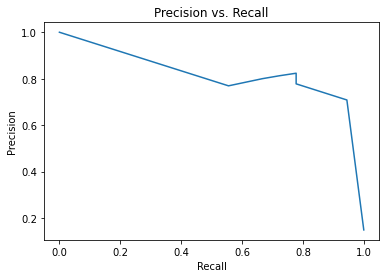

In [16]:
#Getting Scores of cross validation
y_scores_val = classifier2.predict_proba(X_validate)
#Visualizing the Precision vs. Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_validate,y_scores_val[:,1])
plt.plot(recalls,precisions)
plt.title("Precision vs. Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")

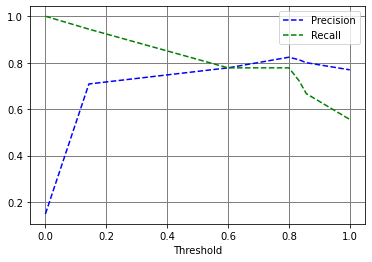

In [17]:
#Visualizing the Threshold Curve
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

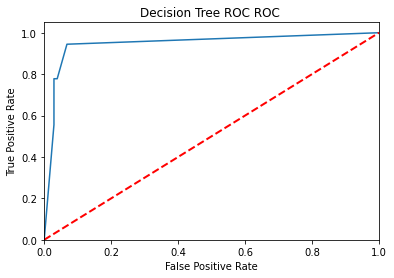

In [18]:
#Creating ROC 
fpr, tpr, thresholds = metrics.roc_curve(y_validate,y_score= y_scores_val[:,1] )

#Visualizing ROC Curve
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color="r", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC ROC ")
plt.show()

In [19]:
#Getting the AUC score
metrics.roc_auc_score(y_validate,y_CV_Pred)

0.8646170442286947

## Calculating Precision, Recall, and F1-Score with Test Data<a class="anchor" id="section_1_7"></a>

In [20]:
print(confusion_matrix(y_test,y_pred))

[[220   5]
 [  8  26]]


In [21]:
print (classification_report(y_test,y_pred)) 


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       225
           1       0.84      0.76      0.80        34

    accuracy                           0.95       259
   macro avg       0.90      0.87      0.89       259
weighted avg       0.95      0.95      0.95       259



In [22]:
print("Precision Score is = ", precision_score(y_test, y_pred, average='macro'))
print("Recall Score is = ", recall_score(y_test, y_pred, average='macro'))
print("F-1 Score is = ", f1_score(y_test, y_pred, average='macro'))

Precision Score is =  0.9018109790605546
Recall Score is =  0.8712418300653595
F-1 Score is =  0.8856512141280353


## Visualization of Graphs using the Test Data <a class="anchor" id="section_1_8"></a>

Text(0, 0.5, 'Precision')

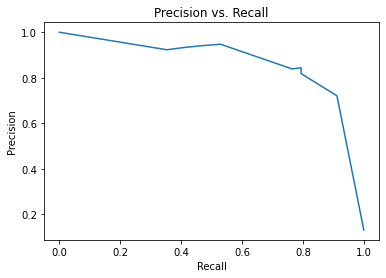

In [23]:
#Getting Scores of test 
y_scores_test = classifier2.predict_proba(X_test)
#Visualizing the Precision vs. Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_test[:,1])
plt.plot(recalls,precisions)
plt.title("Precision vs. Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")


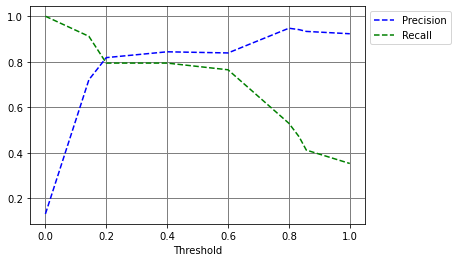

In [24]:
#Visualizing the Threshold Curve
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

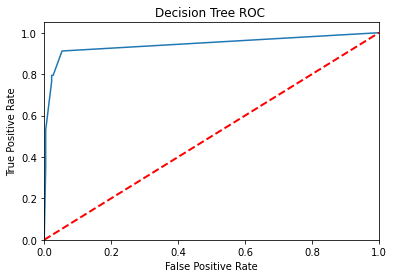

In [25]:
#Creating ROC 
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score= y_scores_test[:,1] )

#Visualizing ROC Curve
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color="r", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC ")
plt.show()

In [26]:
#Getting the AUC score
metrics.roc_auc_score(y_test,y_pred)

0.8712418300653594

## Visualization of Decsison Tree after Hyper Parameter Tuning <a class="anchor" id="section_1_9"></a>

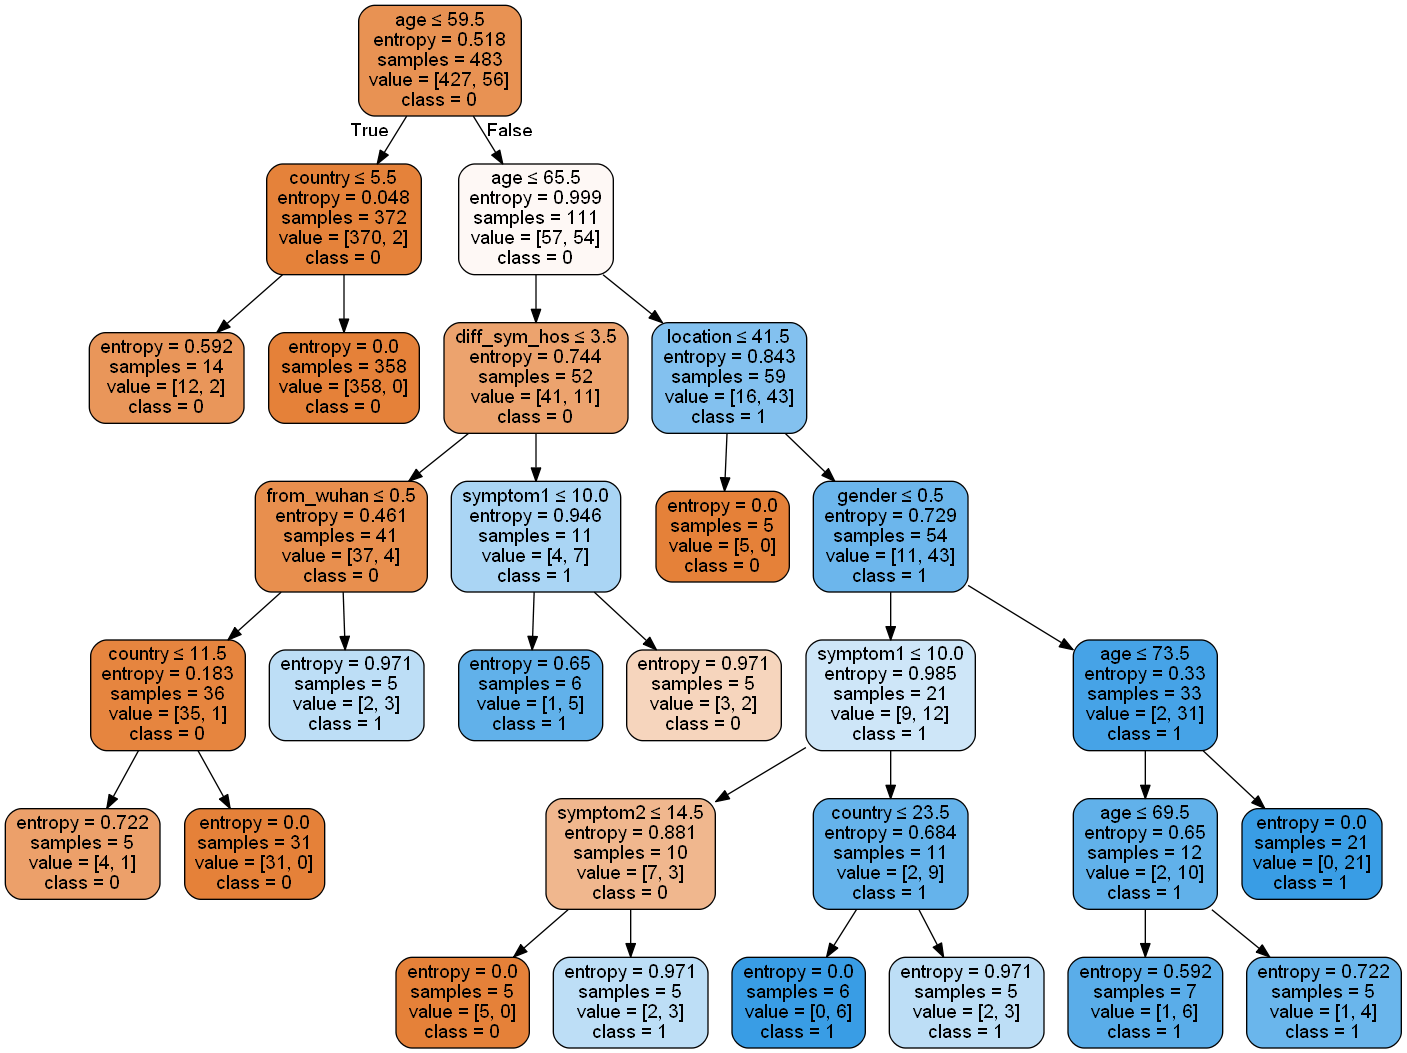

In [27]:
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data,rounded= True,filled =True , special_characters = True ,feature_names= feature_cols, class_names = ["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Data.png")
Image(graph.create_png())

# Support Vector Machines  <a class="anchor" id="Support_Vector_Machines"></a>

In [28]:
#Imports for SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import svm

In [29]:
df = pd.read_csv("data.csv")

## Features Selection <a class="anchor" id="section_2_1"></a>

### Measuring Correlation <a class="anchor" id="section_2_1_1"></a>

We will caculate the Pearson correlation coefficient between all available features, then drop features with correlation higher than 50%

In [30]:
cor_matrix = df[df.columns[0:12]].corr().abs()
print(cor_matrix)

            Unnamed: 0  location   country    gender       age  vis_wuhan  \
Unnamed: 0    1.000000  0.123488  0.311170  0.182616  0.069737   0.293568   
location      0.123488  1.000000  0.309347  0.030077  0.027330   0.022821   
country       0.311170  0.309347  1.000000  0.193208  0.072339   0.149798   
gender        0.182616  0.030077  0.193208  1.000000  0.020662   0.005588   
age           0.069737  0.027330  0.072339  0.020662  1.000000   0.157173   
vis_wuhan     0.293568  0.022821  0.149798  0.005588  0.157173   1.000000   
from_wuhan    0.223951  0.080120  0.194170  0.138997  0.051229   0.154200   
symptom1      0.053031  0.033078  0.078971  0.146706  0.209028   0.087330   
symptom2      0.061755  0.017961  0.085210  0.116159  0.127251   0.094360   
symptom3      0.082368  0.010472  0.042933  0.090858  0.074863   0.086113   
symptom4      0.038603  0.026823  0.018526  0.021882  0.069396   0.063738   
symptom5      0.017153  0.033692  0.009371  0.026320  0.049817   0.025780   

In [31]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Features to drop: '+ str(to_drop))

Features to drop: ['symptom2', 'symptom3']


In [32]:
#dropping the two highly correlated features
df.drop('symptom2', inplace=True, axis=1)
df.drop('symptom3', inplace=True, axis=1)

## Feature Unique Values<a class="anchor" id="section_2_2_0"></a>
We will check how frequent each unique value is repeated inside each feature  

In [33]:
for i in range (1,11):
    val_count = df[df.columns[i]].value_counts()
    print('Total count of class inside the feature ' + str(df.columns[i]))
    print(val_count)

Total count of class inside the feature location
108    85
45     78
44     43
114    37
110    33
       ..
74      1
75      1
76      1
77      1
0       1
Name: location, Length: 139, dtype: int64
Total count of class inside the feature country
18    172
8     155
13     90
24     86
12     54
29     37
11     35
28     33
25     32
23     31
4      17
30     17
32     15
15     14
31     14
2      11
7      10
19      9
33      8
21      4
17      3
14      3
3       2
1       1
5       1
6       1
16      1
9       1
10      1
20      1
22      1
26      1
27      1
0       1
Name: country, dtype: int64
Total count of class inside the feature gender
1    389
0    302
2    172
Name: gender, dtype: int64
Total count of class inside the feature age
49.4    223
55.0     65
65.0     44
45.0     36
75.0     32
       ... 
11.0      1
82.0      1
78.0      1
4.0       1
2.0       1
Name: age, Length: 81, dtype: int64
Total count of class inside the feature vis_wuhan
0    706
1    157
Na

### Observation <a class="anchor" id="section_2_2_1"></a>
Based on the analysis above, we notice that **symptom 5** and **symptom 6** have 3 and 1 outliers respectively, so we drop those 2 columns as well 

In [34]:
df.drop('symptom5', inplace=True, axis=1)
df.drop('symptom6', inplace=True, axis=1)
#Remove Unnamed column because it is repeated
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom4,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,12,8,1
1,101,8,0,56.0,0,1,14,12,0,0
2,137,8,1,46.0,0,1,14,12,13,0
3,116,8,0,60.0,1,0,14,12,0,0
4,116,8,1,58.0,0,0,14,12,0,0


In [35]:
Y = df.iloc[:, 9].values #results are in column 9
X = df.iloc[:, :-1].values #All the columns except 11 and starting from column 0 are feature columns
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 30, shuffle = True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state = 0, shuffle = True)

## Training Data <a class="anchor" id="section_2_2"></a>
To use Vector Support Classification (SVC) algorithm, we need define the model kernel. Then, we use the fit() function to train the model with our training data.

In [36]:
svm_clf_org = svm.SVC()
svm_clf_org.fit(x_train,y_train)

SVC()

In [37]:
svm_clf_org.get_params(True) #to view internal model parameters

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Support Vectors <a class="anchor" id="section_2_3"></a>

The number of support vectors for each class can be revealed using **nsupport** attribute <br>
To get the indices of the support vectors, use **support_** attribute

In [38]:
svm_clf_org.n_support_

array([73, 70])

In [39]:
svm_clf_org.support_ 

array([  1,   2,  18,  33,  35,  40,  45,  48,  51,  55,  71,  74,  78,
        79,  86,  90,  94, 102, 114, 134, 136, 140, 158, 163, 178, 180,
       190, 197, 209, 214, 228, 236, 238, 239, 248, 257, 259, 264, 285,
       306, 318, 334, 351, 352, 356, 364, 369, 372, 373, 379, 383, 386,
       398, 402, 411, 446, 456, 460, 466, 467, 470, 477, 482, 490, 500,
       507, 518, 521, 545, 550, 584, 591, 622,   0,  13,  19,  24,  28,
        58,  63,  70,  81, 115, 121, 126, 127, 131, 145, 161, 164, 165,
       167, 201, 212, 233, 246, 258, 266, 271, 272, 277, 280, 293, 296,
       320, 323, 326, 329, 341, 346, 353, 357, 363, 374, 384, 393, 403,
       414, 415, 421, 422, 426, 431, 473, 475, 488, 491, 495, 499, 501,
       510, 515, 524, 531, 552, 557, 558, 562, 577, 587, 601, 603, 612])

To identify the support vector, use support_vectors_ attribute. The data that become the support vector are

In [40]:
print(svm_clf_org.support_vectors_) #identify support vectors

[[ 71.   8.   0. ...  14.  12.   0.]
 [108.  24.   0. ...  14.  12.   0.]
 [ 78.  18.   1. ...   6.  12.   0.]
 ...
 [ 86.  18.   0. ...   2.  12.   7.]
 [128.  18.   0. ...  14.  12.   0.]
 [ 92.   2.   1. ...  14.  12.   0.]]


## Hyper Parameter Tuning for SVM <a class="anchor" id="Hyper_Parameter_Tuning_for_SVM"></a>

In [41]:
#Grid search parameters for Hyper Tuning
param_grid = { 'C':[0.001,0.01,0.1,1],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[2,3,4,5,6],
               'gamma': ['scale','auto',0.01, 0.001, 0.0001],
               'class_weight':['balanced']}

svm_clf = GridSearchCV(svm_clf_org, param_grid, cv=5,verbose=True)
# fitting the model for grid search
svm_clf.fit(x_train, y_train)
print(svm_clf.best_estimator_)
print("Optimal Hyperparameters: ", svm_clf.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
SVC(C=0.01, class_weight='balanced', degree=6, gamma=0.001, kernel='poly')
Optimal Hyperparameters:  {'C': 0.01, 'class_weight': 'balanced', 'degree': 6, 'gamma': 0.001, 'kernel': 'poly'}


According to the grid search, we will use non-linear SVM (poly) because that's what best fits our data and features

## Performance Measurments <a class="anchor" id="section_2_4"></a>

In [42]:
print('Accuracy = ' + str(svm_clf.score(x_val, y_val)))

Accuracy = 0.9545454545454546


In [43]:
y_scores = cross_val_predict(svm_clf, x_val, y_val, cv=5, method = "decision_function")
ys = y_scores

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [44]:
y_pred = cross_val_predict(svm_clf, x_val, y_val, cv=5)
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        99
           1       0.77      0.91      0.83        11

    accuracy                           0.96       110
   macro avg       0.88      0.94      0.91       110
weighted avg       0.97      0.96      0.96       110



In [45]:
print('Confusion Matrix')
print(confusion_matrix(y_val,y_pred))

Confusion Matrix
[[96  3]
 [ 1 10]]


In [46]:
print('Precision = ' + str(precision_score(y_val,y_pred, average="macro")))
print('Recall = ' + str(recall_score(y_val,y_pred, average="macro")))
print('F1-score = ' + str(f1_score(y_val,y_pred, average="macro")))

Precision = 0.8794607454401269
Recall = 0.9393939393939394
F1-score = 0.9064625850340136


Text(0, 0.5, 'Precision')

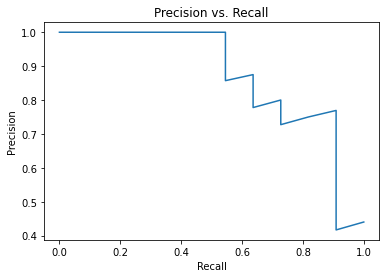

In [47]:
precisions, recalls, thresholds = precision_recall_curve(y_val,ys)
plt.plot(recalls,precisions)
plt.title("Precision vs. Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")

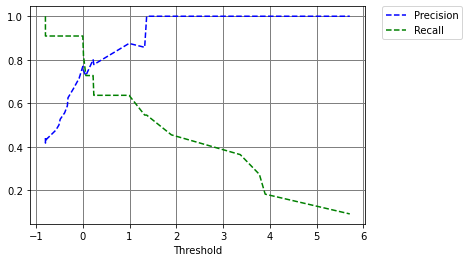

In [48]:
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.grid(b = True, which = "both", axis = "both", color = 'gray', linestyle = '-', linewidth = 1)

Text(0, 0.5, 'True Positive Rate')

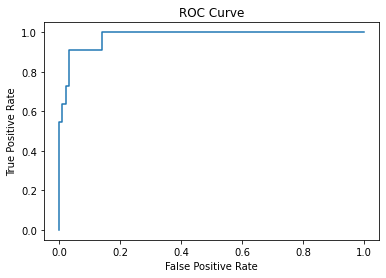

In [49]:
fpr, tpr, thresholds = roc_curve(y_val,ys)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [50]:
roc_auc_score(y_val,ys)

0.9788797061524335

## Metrics Measurments for Test Data <a class="anchor" id="section_2_5"></a>

In [51]:
y_scores_test = svm_clf.decision_function(x_test)
ys_test = y_scores_test

In [52]:
y_pred_test = svm_clf.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.95      0.82      0.88        22

    accuracy                           0.96       130
   macro avg       0.96      0.90      0.93       130
weighted avg       0.96      0.96      0.96       130



In [53]:
print('Precision = ' + str(precision_score(y_test, y_pred_test, average="macro")))
print('Recall = ' + str(recall_score(y_test, y_pred_test, average="macro")))
print('F1-score = ' + str(f1_score(y_test, y_pred_test, average="macro")))

Precision = 0.9556661925082978
Recall = 0.9044612794612794
F1-score = 0.9276088651297472


Text(0, 0.5, 'Precision')

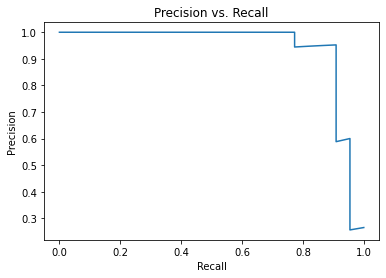

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_test,ys_test)
plt.plot(recalls,precisions)
plt.title("Precision vs. Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")

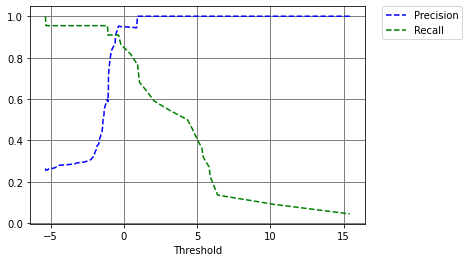

In [55]:
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.grid(b = True, which = "both", axis = "both", color = 'gray', linestyle = '-', linewidth = 1)

Text(0, 0.5, 'True Positive Rate')

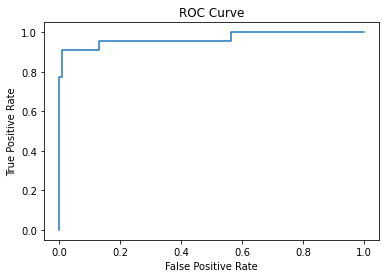

In [56]:
fpr, tpr, thresholds = roc_curve(y_test,ys_test)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [57]:
roc_auc_score(y_test,ys_test)

0.9671717171717172

## Plot Decision Boundary <a class="anchor" id="section_2_6"></a>

We have too many features so we will only draw 2 features of them **country** and **location** on 2D graph

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

X = df.iloc[:, :2].values
y = df.iloc[:, 9].values

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

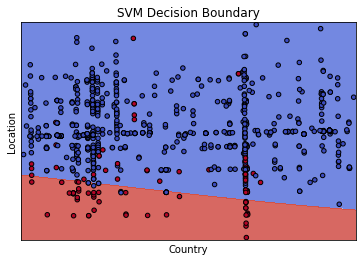

In [59]:
model = svm.SVC(kernel='poly')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Poly SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Location')
ax.set_xlabel('Country')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM Decision Boundary')
plt.show()

Done By Team 10